## Feature map

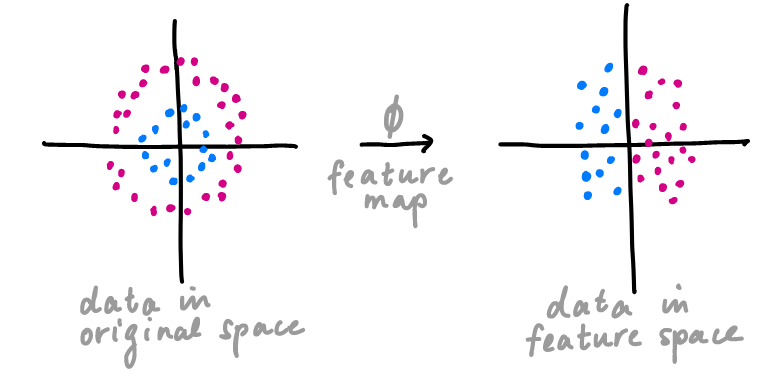

### Why do we need feature map?

##### Problems

Exist quantum classifiers that are trainable quantum circuits used as machine learning model. The first part
of the circuit implements a quantum feature map that encodes classical inputs into quantum states,
embedding the data in a high-dimensional Hilbert space; the second part of the circuit executes a
quantum measurement interpreted as the output of the model. Usually, the measurement is trained
to distinguish quantum-embedded data. This strategy uses a lot of quantum computer resources to separate classes of data. Instead we propose train the first part of the circuit — the embedding — with the objective of maximally separating data classes in Hilbert space.


### What is a feature map?

Many classical machine learning methods re-express their input data in a different space to make it easier to work with, or because the new space may have some convenient properties.

A feature map is a function which maps a data vector to feature space. The main logic in machine learning for doing so is to present your learning algorithm with data that it is better able to regress or classify. The phrase feature map is incredibly broad, anf a wide variety of functions and transformations can be written as feature maps. 

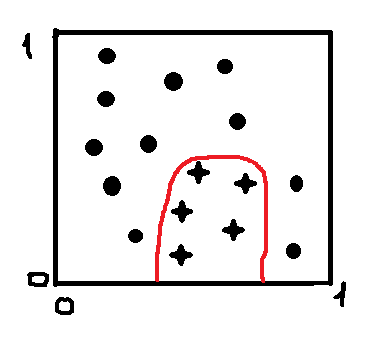



$Ω$  $\subset$  $[0,1]$  x  $[0,1]$ 

$x ∈ Ω$, $(x_1, x_2)$  

$Φ(x_1, x_2)$ --->  $\begin{pmatrix} 1 \\ \sqrt{2} x_1 \\ \sqrt{2} x_2 \\ x_1^2 \\ x_1 x_2 \sqrt{2} \\ x_2^2  \end{pmatrix}$ $∈ ℝ^6$



## Quantum Feature Map 

The map that performs the embedding has been termed a quantum feature map. A quantum embedding is then the representation of classical data points $ x$ as quantum states $|x〉$, facilitated by the feature map.

We assume here that the quantum feature map is enacted by a quantum circuit $Φ(x, θ)$ which associates physical parameters in the preparation of the state $|x〉 = Φ(x, θ) |0 . . . 0〉$. Another set $θ$ of physical parameters is used as free variables that can be adapted via optimization.

All parameters of the embedding are classical objects – they are simply numbers in a suitable high-dimensional vector space.

If we zoom into the overall encoding process, to prepare input for a quantum algorithm as a quantum state, a quantum circuit has to be performed that prepares the corresponding state. This circuit can be generated in classical preprocessing steps and then generate the circuit for state preparation.


### 1. Basis encoding

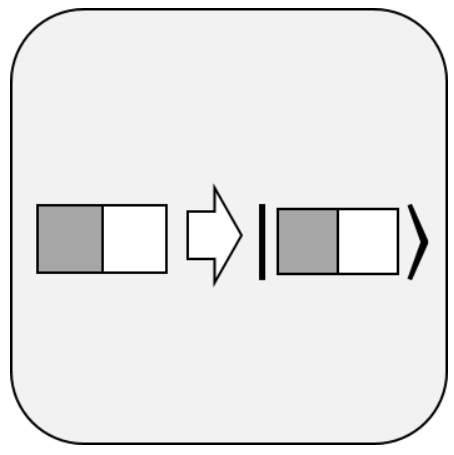

Basis encoding is primarily used when real numbers have to be arithmetically manipulated in a quantum algorithm. In a nutshell, such an encoding represents real numbers as binary numbers and then transforms them into a quantum state on a computational basis.

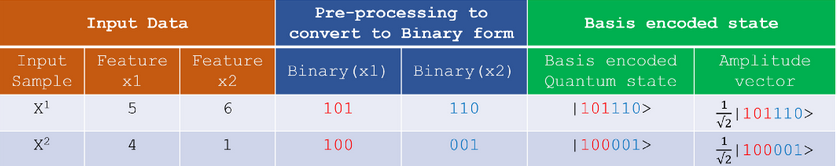

(<Figure size 600x700 with 1 Axes>, <Axes:>)


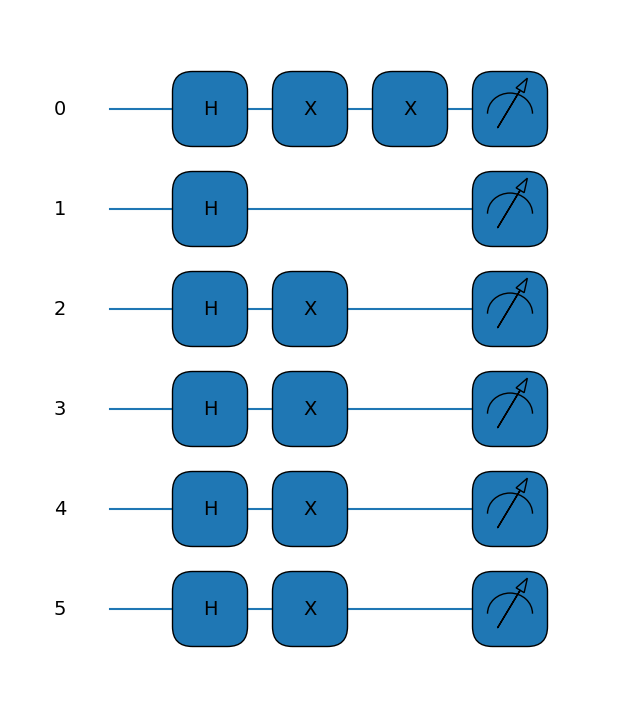

In [12]:
import pennylane as qml
from pennylane import numpy as np

from pennylane.templates.embeddings import BasisEmbedding

dev = qml.device('default.qubit', wires=6)

@qml.qnode(dev)
def circuit(data):
    for i in range(6):
        qml.Hadamard(i)
    for i in range(len(data)):
        BasisEmbedding(features=data[i], wires=range(6),do_queue=True)
    return  qml.state()

data=[[1,0,1,1,1,0],
      [1,0,0,0,0,1]]

circuit(data)

print(qml.draw_mpl(circuit, expansion_strategy="device")(data))

### 2. Amplitude encoding

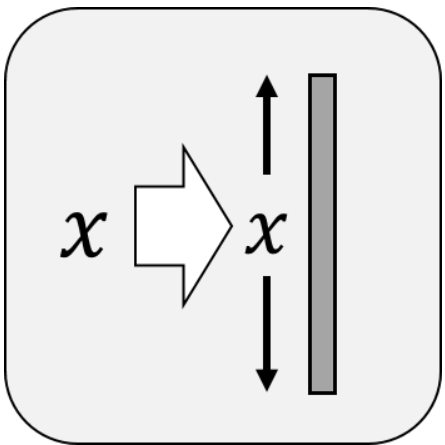

In this technique, the data is encoded into the amplitudes of a quantum state. If the arithmetic manipulation of data by quantum algorithms is not in the foreground, more compact data representations are used. Especially, the large Hilbert space of a quantum device is properly exploited in such encodings. This encoding requires $log_2 (n)$ qubits to represent an n-dimensional data point.

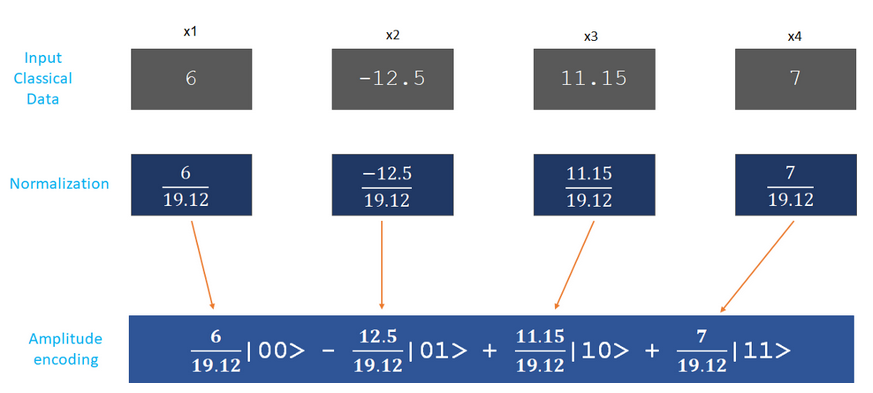

(<Figure size 400x300 with 1 Axes>, <Axes:>)


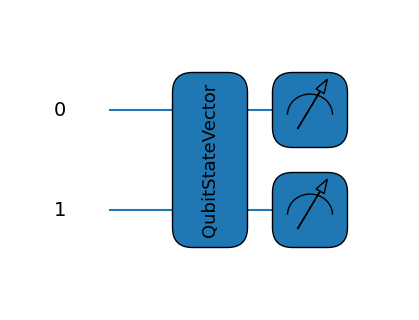

In [11]:
from pennylane.templates.embeddings import AmplitudeEmbedding

# quantum device where you want to run and how many Qubits

dev = qml.device('default.qubit', wires=2)
@qml.qnode(dev)
def circuit(data):
    AmplitudeEmbedding(features=data, wires=range(2),normalize=True)
    return qml.state()

data = [6,-12.5,11.15,7]
circuit(data)

print(qml.draw_mpl(circuit, expansion_strategy="device")(data))

### 3. Angle encoding

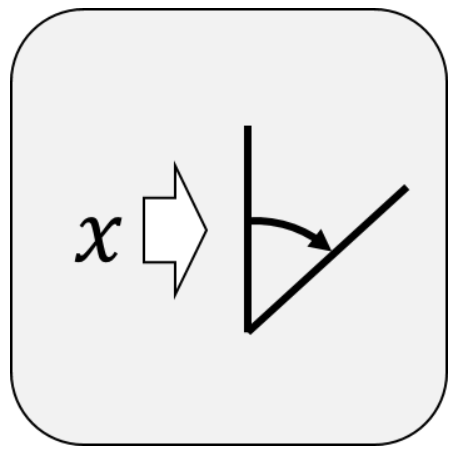

Angle encoding is essentially the most basic form of encoding classical data into a quantum state. The n classical features are encoded into the rotation angle of the n qubit. Angle encoding, also known as Tensor product encoding, requires n qubits to represent n-dimensional data but is cheaper to prepare in complexity: it requires one rotation on each qubit. This encoding is directly useful for processing data in quantum neural networks. Angle encoding is performed by applying a gate rotation about the x-axis 𝑅𝑥(v) or y-axis 𝑅𝑦(v), where 𝑣 is the value to encode. 

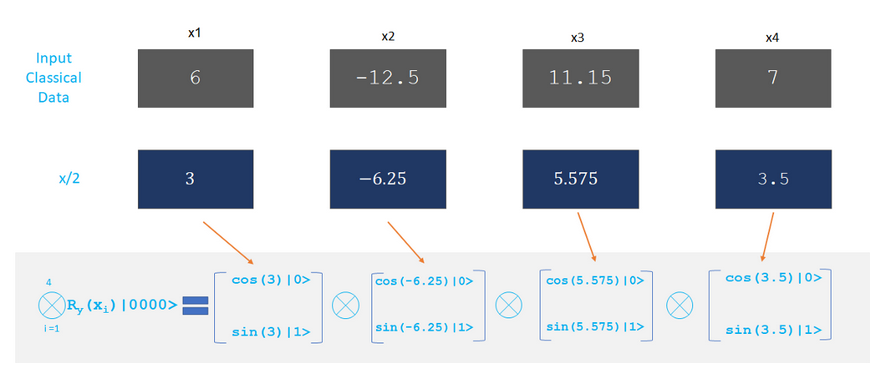

(<Figure size 700x500 with 1 Axes>, <Axes:>)


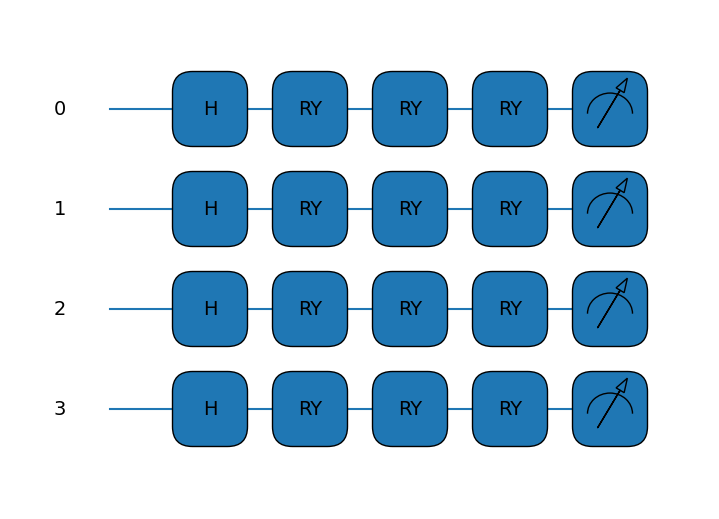

In [14]:
from pennylane.templates.embeddings import AngleEmbedding
dev = qml.device('default.qubit', wires=4)
@qml.qnode(dev)
def circuit(data):
    for i in range(4):
        qml.Hadamard(i)
    for i in range(len(data)):
        AngleEmbedding(features=data[i], wires=range(4),rotation='Y')
    return  qml.state()

data = np.array([[6,-12.5,11.15,7],[8,9.5,-11,-5],[5,0.5,8,-7]])

#print(circuit(data))
print(qml.draw_mpl(circuit, expansion_strategy="device")(data))

The main advantage of this encoding is that it is very efficient in terms of operations: Only a constant number of parallel operations are needed regardless of how many data values need to be encoded. This is not optimal from a qubit point of view, as every input vector component requires one qubit.

## SVM (Support Vector Machines)

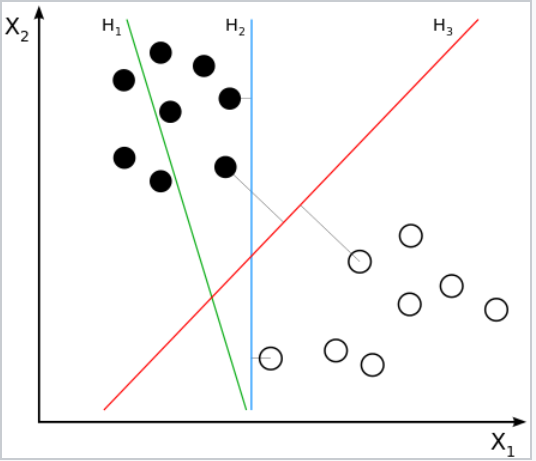


Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. 

## Kernel-Function

$K(x, y) = <f(x), f(y)>.$ Here K is the kernel function, $x, y$ are n dimensional inputs. $f$ is a map from $n$-dimension to $m$-dimension space. $< x,y>$ denotes the dot product. usually $m$ is much larger than $n$.

Simple Example: $x = (x1, x2, x3); y = (y1, y2, y3)$. Then for the function $f(x) = (x1x1, x1x2, x1x3, x2x1, x2x2, x2x3, x3x1, x3x2, x3x3)$, the kernel is $K(x, y ) = (<x, y>)²$.

Let’s plug in some numbers to make this more intuitive: suppose $x = (1, 2, 3); y = (4, 5, 6)$. Then:
$f(x) = (1, 2, 3, 2, 4, 6, 3, 6, 9)
f(y) = (16, 20, 24, 20, 25, 30, 24, 30, 36)
<f(x), f(y)> = 16 + 40 + 72 + 40 + 100+ 180 + 72 + 180 + 324 = 1024$

A lot of algebra, mainly because $f$ is a mapping from 3-dimensional to 9 dimensional space.

Now let us use the kernel instead:
$K(x, y) = (4 + 10 + 18 ) ^2 = 32² = 1024$

## QSVM (Quantum Support Vector Machines)

In quantum kernel machine learning, quantum feature maps $ϕ(𝑥)$ is used to map a classical feature vector $ x$ to a quantum Hilbert space, $|ϕ(x)><ϕ(x)|$, such that $K_{i,j}=<ϕ^†(x_j)|ϕ(x_i)>^2$

## What Is Entanglement and Why Is It Important?

Quantum entanglement is the state where two systems are so strongly correlated that gaining information about one system will give immediate information about the other no matter how far apart these systems are.

In quantum computers, changing the state of an entangled qubit will change the state of the paired qubit immediately. Therefore, entanglement improves the processing speed of quantum computers. Doubling the number of qubits will not necessarily double the number of processes since processing one qubit will reveal information about multiple qubits. According to research, quantum entanglement is necessary for a quantum algorithm to offer an exponential speed-up over classical computations.

Simple 2-qubit entanglement pairs (EPR) have a few identified applications in quantum computing, one of this feature is:

Superdense coding.
In simple words, superdense coding is the process of transporting 2 classical bits of information using 1 entangled qubit.

## Parametrized Circuit

Consider the following single-qubit circuits:

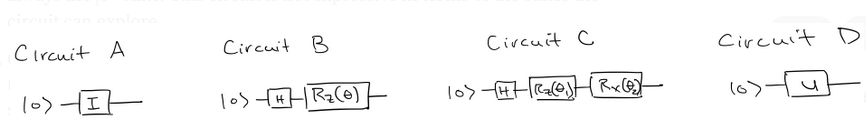

1. Circuit A consists of an identity gate. This means that the output state is always the |0> state. This circuit is not expressive in terms of the states the circuit can explore.

2. Circuit B has a parameterized RZ gate following a Hadamard gate. By tuning the RZ parameter value, you are exploring the equator of the Bloch sphere.

3. Circuit C is similar to circuit B but has an additional parameterized RX gate. This provides an additional degree-of-freedom to move about the Bloch sphere.

4. Lastly, as reference, we have circuit D, a uniformly sampled unitary U that uniformly maps the |0> state to any point on the Bloch sphere. That is, this circuit is able to express any state on the Bloch sphere with equal probability.

If we were to sample 1000 different output states for each circuit for parameterized quantum circuits, we get something like this:

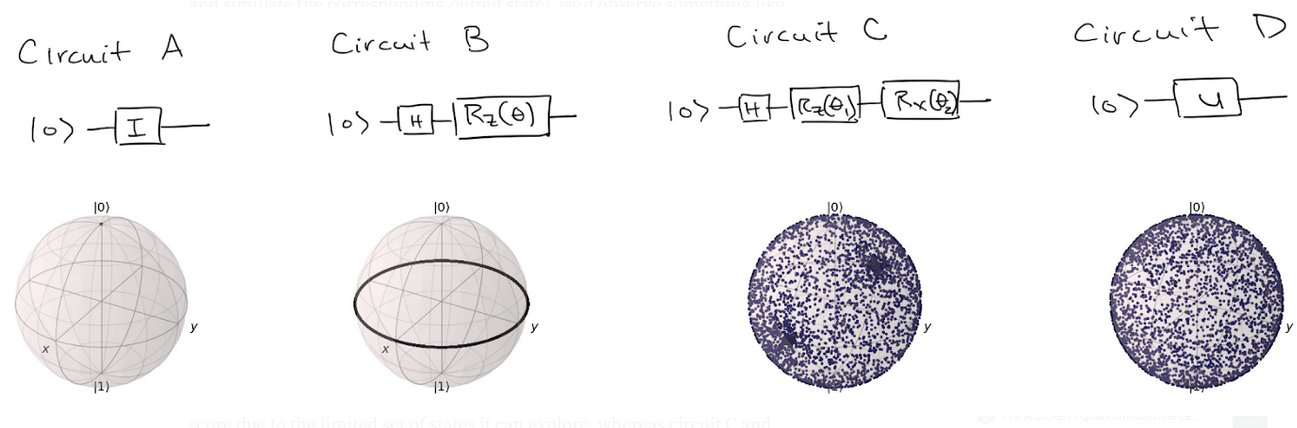